In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Univariate gaussian system

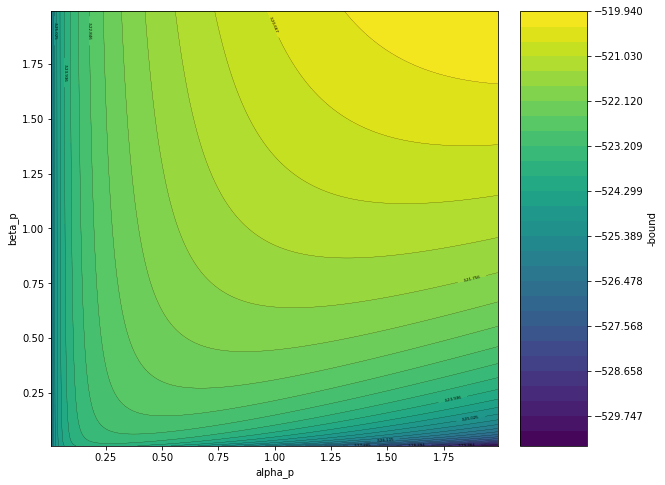

In [2]:
# alpha_p vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('alpha_p')
axes.set_ylabel('beta_p')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


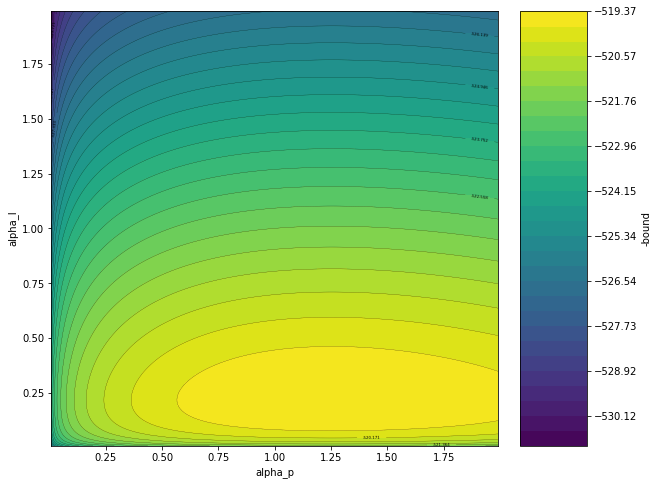

In [3]:
# alpha_l vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma_alphas.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('alpha_l')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [4]:
alphas = np.load('../../numerical_analysis/alphas.npy')
bound = np.load('../../numerical_analysis/bound.npy')
alphas_p = np.load('../../numerical_analysis/alphas_p.npy')
rb_value_p = np.load('../../numerical_analysis/rb_value_p.npy')


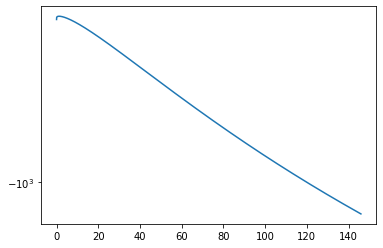

In [5]:
# KL bound as a function of alpha_p

fig, ax = plt.subplots()
ax.plot(alphas_p, rb_value_p)
ax.set_yscale('symlog')

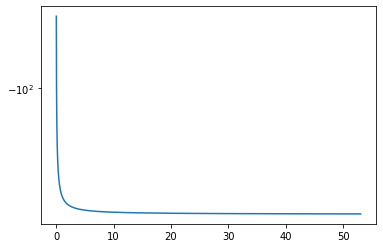

In [6]:
# Renyi bound as a function of alpha

fig, ax = plt.subplots()
ax.plot(alphas, bound)
ax.set_yscale('symlog')

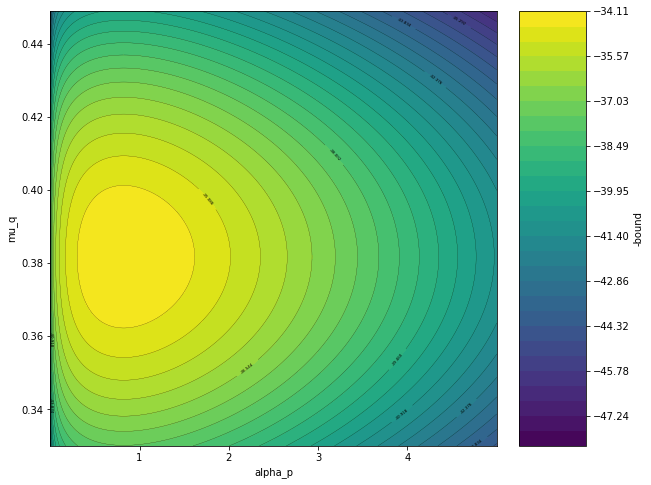

In [7]:
# mu_q vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.002
delta2 = 0.001
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

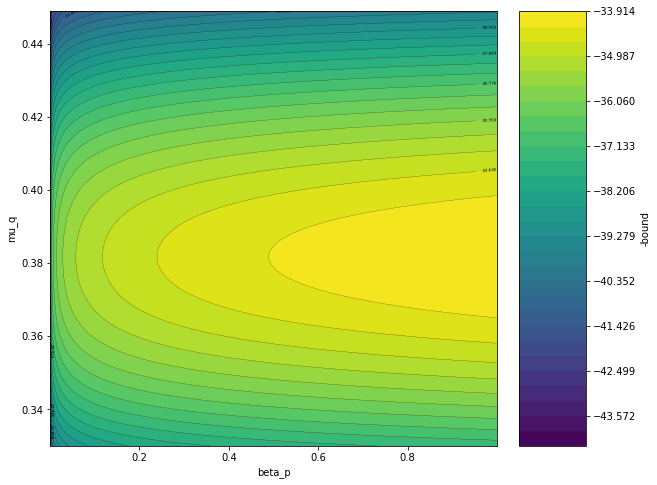

In [8]:
# mu_q vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.002
delta2 = 0.001
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

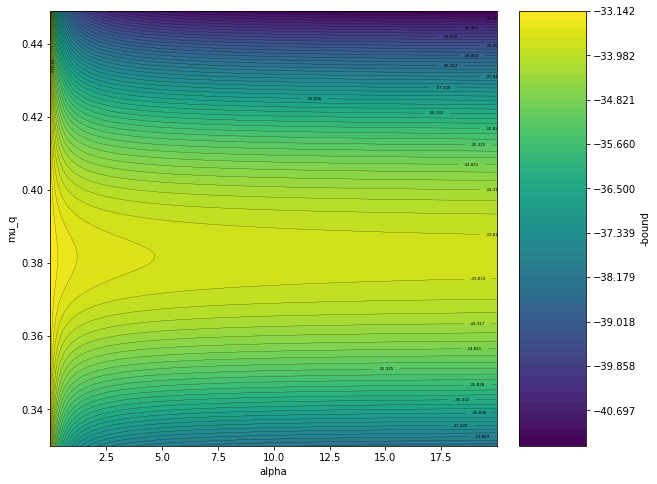

In [9]:
# mu_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.02
delta2 = 0.001
xlist = np.arange(0.001, 20, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)



/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


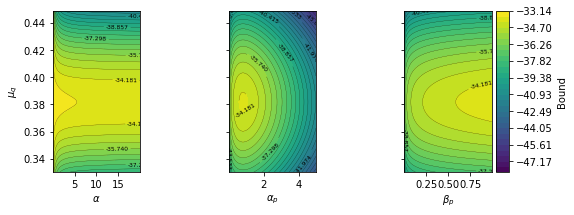

In [32]:
# sigma_q vs alpha (Renyi bound)

data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]
min_lev=data_contour2.to_numpy().min()
levels = np.linspace(data_contour2.to_numpy().min(),data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.001
delta21 = 0.002
delta22 = 0.001
delta31 = 0.002
delta32 = 0.001

xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.33, 0.45, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.33, 0.45, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.33, 0.45, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\mu_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
fig.savefig('/home/francesco/renyibounds/univ_muq.pdf', bbox_inches='tight', pad_inches=0)
fig.tight_layout(w_pad=8.5, h_pad=0.5)


TypeError: Shapes of x (199, 500) and z (199, 2500) do not match

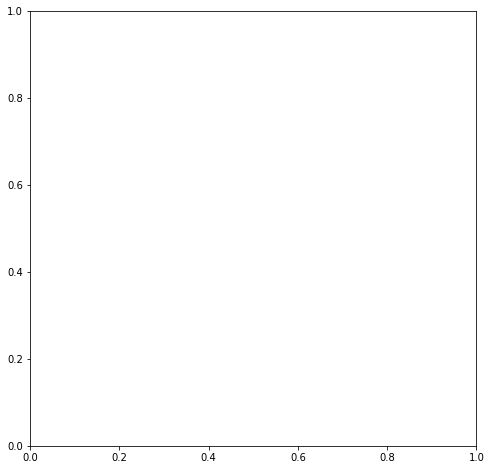

In [12]:
# sigma_q vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

TypeError: Shapes of x (199, 100) and z (199, 500) do not match

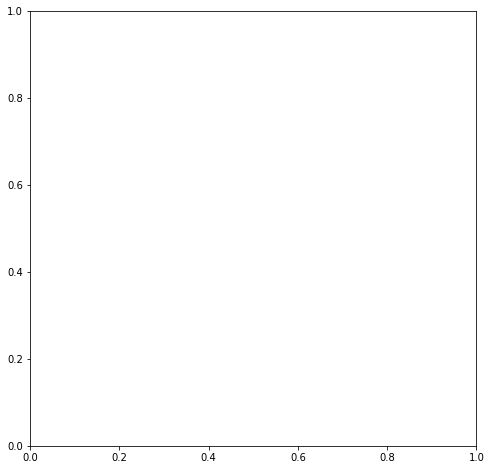

In [13]:
# sigma_q vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_beta_p_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

TypeError: Shapes of x (199, 500) and z (199, 1000) do not match

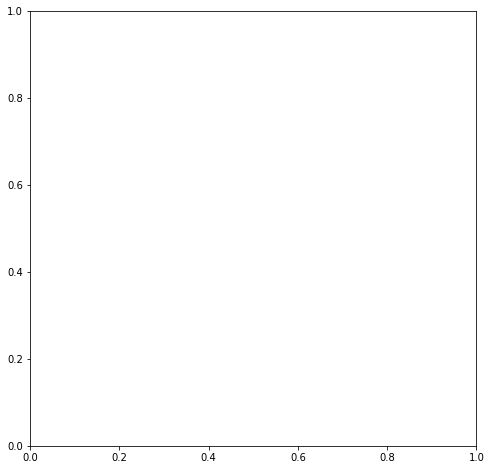

In [14]:
# sigma_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = data_contour.fillna(np.nanmin(data_contour.to_numpy()))
levels = np.linspace(-40,data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.04
delta2 = 0.00001
xlist = np.arange(0.001, 20, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)



/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


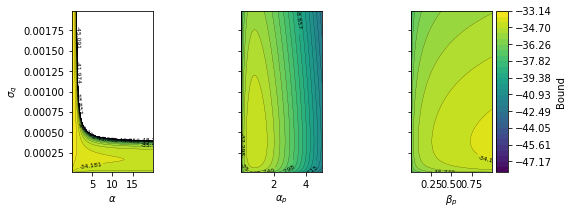

In [34]:
# sigma_q vs alpha (Renyi bound)

data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_sigmaq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_sigmaq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_sigmaq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]

levels = np.linspace(min_lev,data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.00001
delta21 = 0.002
delta22 = 0.00001
delta31 = 0.002
delta32 = 0.00001
xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.00001, 0.002, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.00001, 0.002, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.00001, 0.002, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors2 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\sigma_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
fig.savefig('/home/francesco/renyibounds/univ_sigma_q.pdf', bbox_inches='tight', pad_inches=0)
fig.tight_layout(w_pad=8.5, h_pad=0.5)




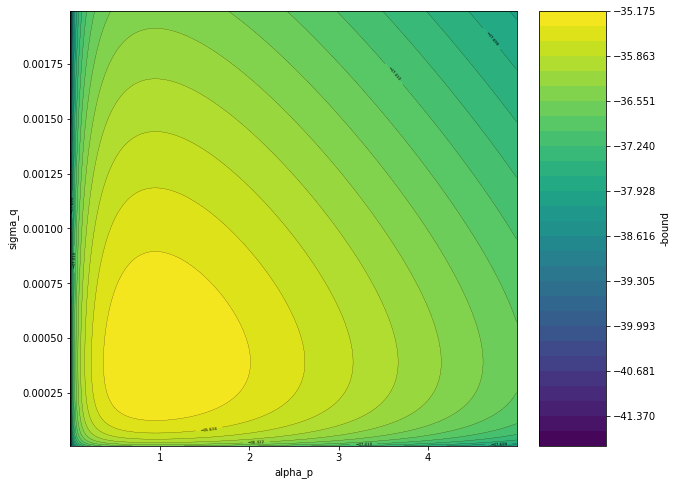

In [16]:
# sigma_q vs gamma constant var
# sigma_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_beta_p_sigmaq_const_mean.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

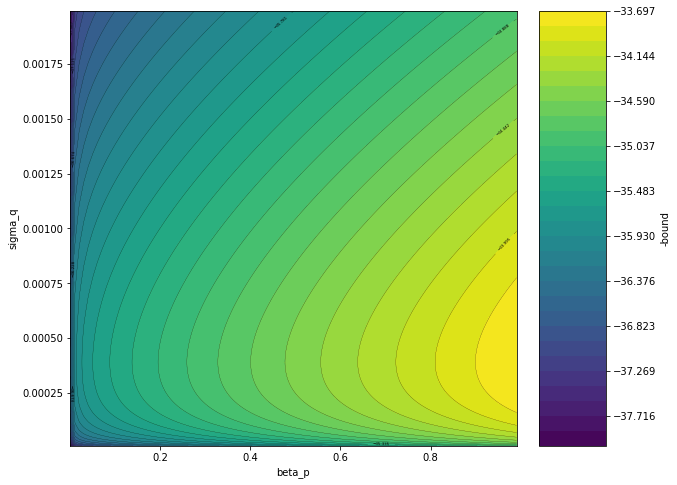

In [17]:
# sigma_q vs gamma constant var

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_beta_p_sigmaq_const_var.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

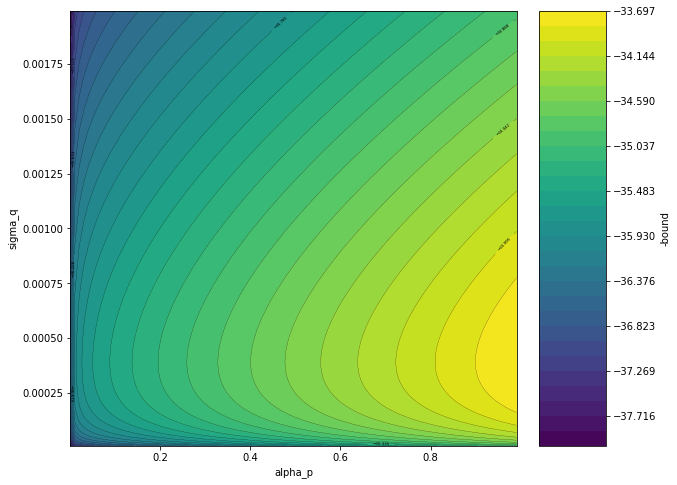

In [18]:
# sigma_q vs gamma constant var
# sigma_q vs alpha (Renyi bound)




fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Renyi multimodal bound

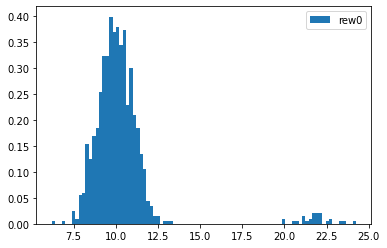

In [19]:
samples0 = list(np.load('../../numerical_analysis/multimodal_samples.npy'))
rew0 = list(np.load('../../numerical_analysis/multimodal_rew.npy'))
fig = plt.hist(rew0,  density=True, alpha=1, bins=90, label='rew0')
plt.legend(loc='upper right')


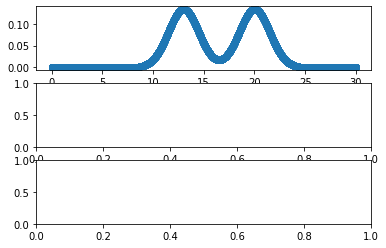

In [20]:
ps0 = list(np.load('../../numerical_analysis/multimodal_ps.npy'))
fig, axes = plt.subplots(3)
axes[0].scatter(samples0, ps0)


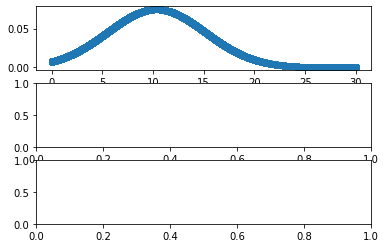

In [21]:
pos0 = list(np.load('../../numerical_analysis/multimodal_pos.npy'))
fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pos0)

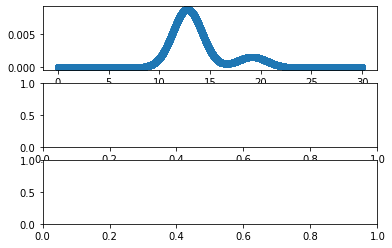

In [22]:
pso0 = list(np.load('../../numerical_analysis/multimodal_pso.npy'))
fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pso0)

In [59]:
# alpha = 1e-6
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]


In [60]:
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])

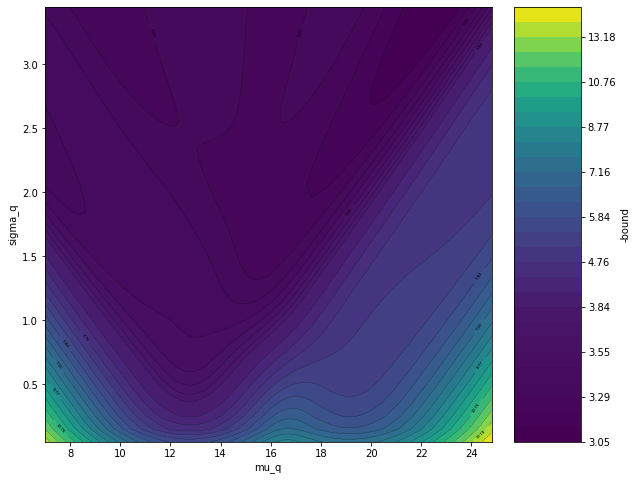

In [61]:

levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
#levels = -levels[::-1]
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.1
xlist = np.arange(7, 25, delta1)
ylist = np.arange(0.05, 3.5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


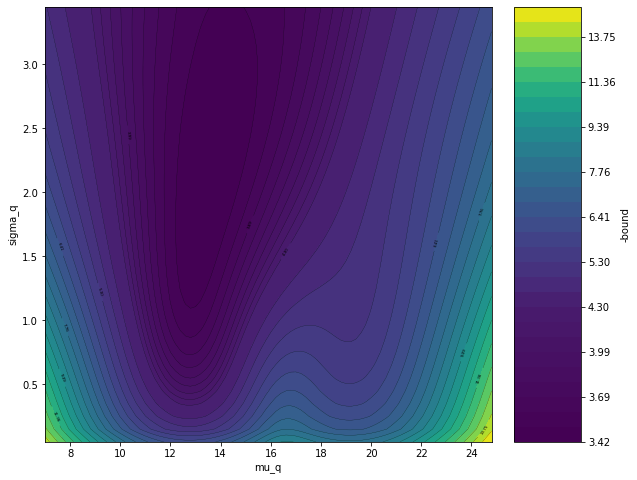

In [62]:
# alpha = 0.5

data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2

#delta1 = 0.2
#delta2 = 0.2
#xlist = np.arange(0, 26, delta1)
#ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [63]:
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.2,np.log10(data_contour.to_numpy().max()), num=15)
levels = np.concatenate([levels1,levels2])
levels

array([ 3.41898632,  3.53332086,  3.65147887,  3.77358821,  3.89978101,
        4.03019384,  4.16496781,  4.30424876,  5.41872814,  5.84425781,
        6.30320409,  6.79819115,  7.33204927,  7.90783097,  8.52882848,
        9.19859258,  9.92095287, 10.70003971, 11.5403078 , 12.44656166,
       13.42398314, 14.47816097, 15.6151228 ])

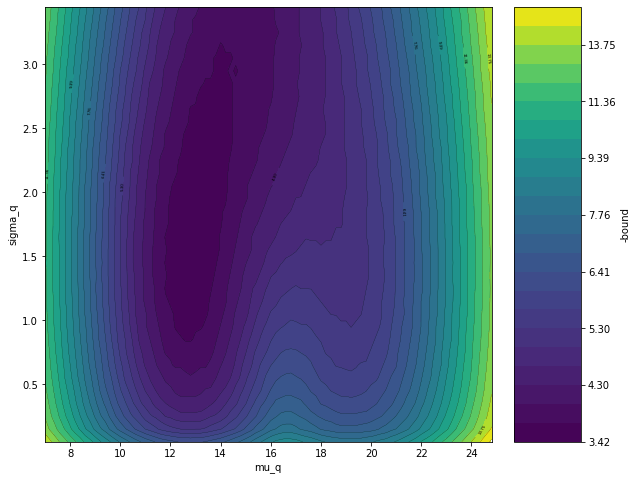

In [64]:
# alpha = 0.99
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()-0.000000001),np.log10(data_contour.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()+0.001), num=20)
levels = np.concatenate([levels1,levels2])


data_contour = pd.read_csv('../../numerical_analysis/contour_0.99999.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

#levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

#delta1 = 0.2
#delta2 = 0.2
#xlist = np.arange(0, 26, delta1)
#ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


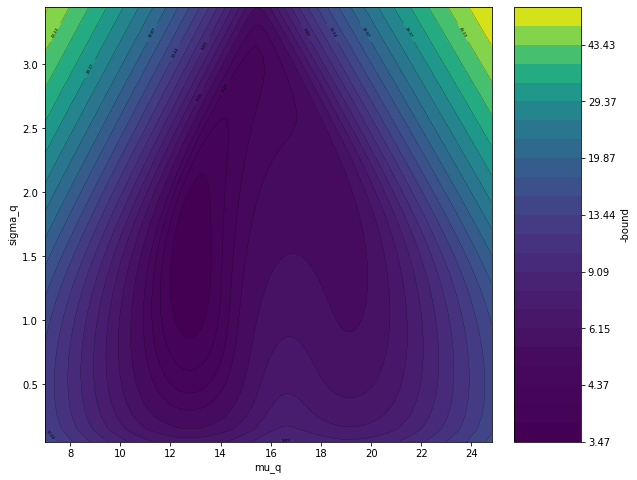

In [65]:
# alpha = 2


data_contour = pd.read_csv('../../numerical_analysis/contour_2.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()+0.0001), num=20)
levels = np.concatenate([levels1,levels2])

linewidth_contour = 0.2

#delta1 = 0.2
#delta2 = 0.2
#xlist = np.arange(0, 26, delta1)
#ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


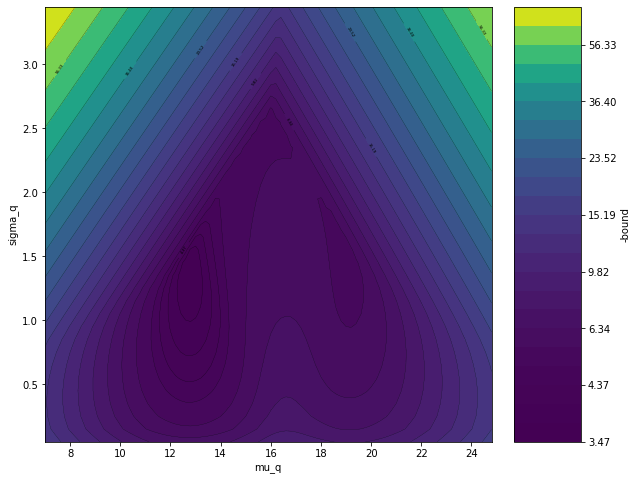

In [66]:
# alpha = 10

data_contour = pd.read_csv('../../numerical_analysis/contour_10.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2

#delta1 = 0.2
#delta2 = 0.2
#xlist = np.arange(0, 26, delta1)
#ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [76]:
#data = pd.read_csv('../data_lqr.csv')
data_opt = pd.read_csv('alpha0.csv')
data_opt = data_opt.rename(columns={data_opt.columns[0]: 'step'})

#data['rew'] = np.ceil((data['rew'].values / step)) * step
#data_opt = data_opt[::5]
data_opt.head(100)
data_opt['mu1']

0            NaN
1      25.000000
2            NaN
3            NaN
4      11.476310
         ...    
394          NaN
395          NaN
396    11.509402
397          NaN
398          NaN
Name: mu1, Length: 399, dtype: float64

In [ ]:
def create_quiver_matplotlib(i, data_opt):
    x = data_opt['bias'][0:i]
    y = data_opt['weights'][0:i]
    u = data_opt['bias'].diff()[1:i+1] *0.8
    v = data_opt['weights'].diff()[1:i+1] *0.8
    norm = np.sqrt(u**2+v**2) 

    return x,y,u,v, norm

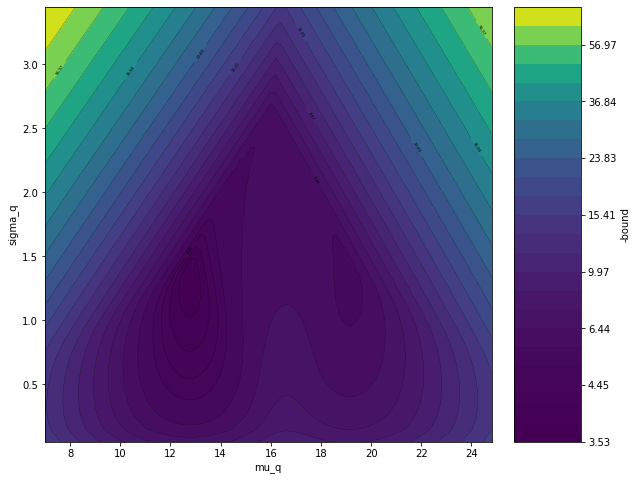

In [67]:
# alpha = 1e6

data_contour = pd.read_csv('../../numerical_analysis/contour_1000000000.0.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2
linewidth_quiver = 0.003

#delta1 = 0.2
#delta2 = 0.2
#xlist = np.arange(0, 26, delta1)
#ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')


pos_x, pos_y, u, v, norm = create_quiver_matplotlib(idx1-1,data_opt)
#ax.scatter
#ax.plot(x_dot,y_dot, marker="o")
axes1[0].quiver(pos_x,pos_y,u,v,  scale_units='xy', angles='xy', scale=1,width=linewidth_quiver, color='r')
axes1[1].quiver(pos_x,pos_y,u,v,  scale_units='xy', angles='xy', scale=1,width=linewidth_quiver, color='r')
#ax.scatter
#ax.plot(x_dot,y_dot, marker="o")
pos_x, pos_y, u, v, norm = create_quiver_matplotlib(len(data_opt)-2,data_opt)


axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [68]:
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour1 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour2 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.99999.csv')
data_contour3 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_1000000000.0.csv')
data_contour4 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

In [69]:
levels1 = np.logspace(np.log10(data_contour1.to_numpy().min()),np.log10(data_contour1.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour1.to_numpy().min())+0.135,np.log10(data_contour1.to_numpy().max()), num=20)
levels_1 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour2.to_numpy().min()),np.log10(data_contour2.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour2.to_numpy().min())+0.135,np.log10(data_contour2.to_numpy().max()), num=20)
levels_2 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour3.to_numpy().min()-0.000000001),np.log10(data_contour3.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour3.to_numpy().min())+0.135,np.log10(data_contour3.to_numpy().max()+0.001), num=20)
levels_3 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour4.to_numpy().min()),np.log10(data_contour4.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour4.to_numpy().min())+0.135,np.log10(data_contour4.to_numpy().max()), num=20)
levels_4 = np.concatenate([levels1,levels2])

levels_1 = -levels_1[::-1]
levels_2 = -levels_2[::-1]
levels_3 = -levels_3[::-1]
levels_4 = -levels_4[::-1]


data_contour1 = - data_contour1
data_contour2 = - data_contour2
data_contour3 = - data_contour3
data_contour4 = - data_contour4


<ipython-input-71-98e64b08f776>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout(w_pad=8.5, h_pad=0.5)
<ipython-input-71-98e64b08f776>:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig2.tight_layout(w_pad=8.5, h_pad=4.5)


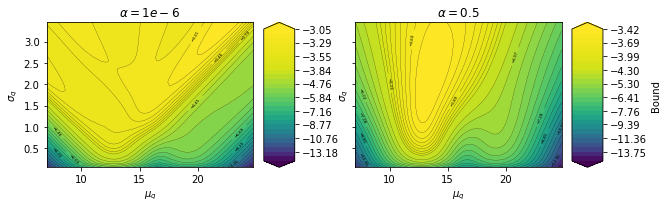

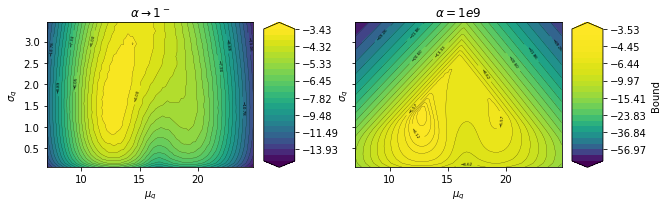

In [71]:


delta1 = 0.2
delta2 = 0.1
xlist = np.arange(7, 25, delta1)
ylist = np.arange(0.05, 3.5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig1, axes1 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)
fig2, axes2 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)

#cp = ax.contourf(x, y, data_contour.values.tolist(), 50, linewidths=1)
#line_colors = ['black' for l in cp.levels]


cpf1 = axes1[0].contourf(x, y, data_contour1.values.tolist(), levels_1, extend="both")
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes1[0].contour(x, y, data_contour1.values.tolist(),
                       levels=levels_1, colors=line_colors1, linewidths=linewidth_contour)




# Set all level lines to black
cpf2 = axes1[1].contourf(x, y, data_contour2.values.tolist(), levels_2, extend="both")
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes1[1].contour(x, y, data_contour2.values.tolist(),
                       levels=levels_2, colors=line_colors2, linewidths=linewidth_contour)
# Make plot and customize axes
#plt.colorbar(cp)
cpf3 = axes2[0].contourf(x, y, data_contour3.values.tolist(), levels_3, extend="both")
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes2[0].contour(x, y, data_contour3.values.tolist(),
                       levels=levels_3, colors=line_colors3, linewidths=linewidth_contour)

# Set all level lines to black
cpf4 = axes2[1].contourf(x, y, data_contour4.values.tolist(), levels_4, extend="both")
line_colors4 = ['black' for l in cpf4.levels]
cp4 = axes2[1].contour(x, y, data_contour4.values.tolist(),
                       levels=levels_4, colors=line_colors4, linewidths=linewidth_contour)
#ax.clabel(cp, fontsize=10, colors=line_colors)


#axes.set_box_aspect(1)
#axes[0].set_box_aspect(1)
#axes[1].set_box_aspect(1)
#axes[2].set_box_aspect(1)
#axes[3].set_box_aspect(1)
axins0 = inset_axes(axes1[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[0].transAxes,
                   borderpad=0,
                   )

axins1 = inset_axes(axes1[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[1].transAxes,
                   borderpad=0,
                   )

axins2 = inset_axes(axes2[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[0].transAxes,
                   borderpad=0,
                   )

axins3 = inset_axes(axes2[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[1].transAxes,
                   borderpad=0,
                   )
axes1[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=4)
axes1[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=4)
axes2[0].clabel(cp3, cp3.levels[::3], inline=True, fontsize=4)
axes2[1].clabel(cp4, cp4.levels[::3], inline=True, fontsize=4)



plt.colorbar(cpf1, cax=axins0)  # draw colorbar
plt.colorbar(cpf2,label='Bound', cax=axins1)  # draw colorbar
plt.colorbar(cpf3, cax=axins2)  # draw colorbar

plt.colorbar(cpf4,label='Bound', cax=axins3)  # draw colorbar

#fig.text(0.51, 0.01, 'Bias', ha='center')
#fig.text(0.00, 0.5, 'Weight', va='center', rotation='vertical')#axes[0].set_title(r'Optimization in the true $J(\theta)$')
axes1[0].set_xlabel(r'$\mu_q$')
axes1[0].set_ylabel(r'$\sigma_q$')
axes1[0].set_title(r'$\alpha = 1e-6$')
axes1[1].set_title(r'$\alpha = 0.5$')
axes2[0].set_title(r'$\alpha \rightarrow 1^-$')
axes2[1].set_title(r'$\alpha = 1e9$')
axes1[1].set_xlabel(r'$\mu_q$')
axes1[1].set_ylabel(r'$\sigma_q$')
axes2[0].set_xlabel(r'$\mu_q$')
axes2[0].set_ylabel(r'$\sigma_q$')
axes2[1].set_xlabel(r'$\mu_q$')
axes2[1].set_ylabel(r'$\sigma_q$')
#fig1.suptitle('PVF optimization after 60 episodes', fontsize=8)
#fig2.suptitle('PVF optimization after 500 episodes', fontsize=8)
fig1.tight_layout(w_pad=8.5, h_pad=0.5)
fig2.tight_layout(w_pad=8.5, h_pad=4.5)
#fig1.savefig('contour_1.pdf', bbox_inches='tight', pad_inches=0)
#fig2.savefig('contour_2.pdf', bbox_inches='tight', pad_inches=0)